# DLProfile Example using Cosmic Tagger Application

## Set imports and neccessary environment variables

In [37]:
import pathlib
import os
import sys
import matplotlib.pyplot as plt
import warnings
import pprint

In [2]:
DLPOFILE_DIR="{}".format(pathlib.Path(os.getcwd()).parent.absolute())
sys.path.insert(0, DLPOFILE_DIR)
warnings.filterwarnings('ignore')

In [3]:
os.environ["DARSHAN_DIR"] = "/soft/perftools/darshan/darshan-3.1.8"
os.environ["DLPROFILE_DIR"] = DLPOFILE_DIR

In [4]:
from src.dlprofile import DLProfile

## Create instrance of DL Profile and load the darshan file

In [5]:
profile = DLProfile()

In [6]:
if os.path.exists("/tmp/temp_analysis/run1_p8_pattern.json"):
    os.remove("/tmp/temp_analysis/run1_p8_pattern.json")
DATAPATH_INCLUDES = ["/projects/datascience/dhari/datasets/cosmic_tagger/"]
status = profile.Load("/home/dhari/darshan-logs/apps/cosmic_tagger/run1_p8.darshan", data_paths_include=DATAPATH_INCLUDES)
if status:
    print("Darshan Trace loaded Successfully!")
else:
    print("Darshan Trace load Failed!")
    print(profile._error_str())

Loaded Pre-processed DXT from file: /tmp/temp_analysis/run1_p8_io_df.csv
[============================================================] 100.0% 538 of 538 Analyzing Access Pattern 
Darshan Trace loaded Successfully!


In [7]:
df = profile.GetDXTAsDF()
df['Filename'].unique()

[/projects/datascience/dhari/datasets/cosmic_ta..., /projects/datascience/dhari/datasets/cosmic_ta...]
Categories (2, object): [/projects/datascience/dhari/datasets/cosmic_ta..., /projects/datascience/dhari/datasets/cosmic_ta...]

In [8]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [9]:
summary = profile.GetSummary()
print("\n")
print(color.BOLD + "Data Access Summary (from Darshan):"+ color.END)
print("Total Job time\t\t\t:\t{:0.2f} seconds".format(summary['job_time']))
#FIXME: calculate time per rank and then take max across it.
print("Time spent in I/O\t\t:\t{:0.2f} seconds".format(summary['total_io_time']))
print("% Time spent in I/O\t\t:\t{:0.2f}%".format(float(summary['total_io_time'])*100/summary['job_time']))
print("Total Data Accessed\t\t:\t{:0.2f} GB".format(float(summary['total_io_bytes'])/1024.0/1024.0/1024.0))
print("Data Access Modules used\t:\t{}".format(summary['io_interface_used']))
print("Data Operations\t\t\t:\t{}".format(summary['io_operations_used']))
print("# of files used\t\t\t:\t{}".format(summary['files_used']))
print("# of MPI Ranks\t\t\t:\t{:0.0f} ranks".format(summary['num_ranks']))
      
print(color.UNDERLINE + "Data Transfer size:"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} bytes and {:0.0f} bytes".format(summary['data_transfer_size']['min'],summary['data_transfer_size']['max']))
print("\tAverage\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['mean']))
print("\tMedian\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['median']))
      
print(color.UNDERLINE + "Data Transfer bandwidth: (per rank)"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} B/s and {:0.0f} MB/s".format(summary['data_transfer_bandwidth']['min'],summary['data_transfer_bandwidth']['max']/1024.0/1024.0))
print("\tAverage\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['mean']/1024.0/1024.0))
print("\tMedian\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['median']/1024.0/1024.0))
      
print(color.UNDERLINE + "Access Pattern:"+ color.END)
print("\tSequential\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['sequential'])/summary['access_pattern']['total_operations']*100))
print("\tConsecutive\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['consecutive'])/summary['access_pattern']['total_operations']*100))
#An I/O op issued at an offset greater than where the previous I/O op ended.
#An I/O op issued at the offset immediately after the end of the previous I/O

print("\n")
print(color.BOLD + "Files Summary:"+ color.END)
print("File Types\t\t\t:\t{}".format(summary['file_used_summary']['types']))
print(color.UNDERLINE + "Dataset Size:"+ color.END)
print("\tTotal\t\t\t:\t{:0.3f} GB".format(float(summary['file_used_summary']['size']['total'])/1024.0/1024.0/1024.0))
print("\tMin,Max\t\t\t:\t{:0.3f} GB and {:0.3f} GB".format(float(summary['file_used_summary']['size']['min'])/1024.0/1024.0/1024.0,float(summary['file_used_summary']['size']['max'])/1024.0/1024.0/1024.0))
print("\tAverage\t\t\t:\t{:0.3f} GB".format(float(summary['file_used_summary']['size']['mean'])/1024.0/1024.0/1024.0))



Data Access Summary (from Darshan):
Total Job time			:	897.00 seconds
Time spent in I/O		:	69.12 seconds
% Time spent in I/O		:	7.71%
Total Data Accessed		:	1.21 GB
Data Access Modules used	:	['X_POSIX']
Data Operations			:	['read']
# of files used			:	['/projects/datascience/dhari/datasets/cosmic_tagger/cosmic_tagging_train.h5', '/projects/datascience/dhari/datasets/cosmic_tagger/cosmic_tagging_test.h5']
# of MPI Ranks			:	8 ranks
Data Transfer size:
	Min,Max			:	8 bytes and 6745 bytes
	Average			:	4177 bytes
	Median			:	2531 bytes
Data Transfer bandwidth: (per rank)
	Min,Max			:	93 B/s and 64 MB/s
	Average			:	10 MB/s
	Median			:	6 MB/s
Access Pattern:
	Sequential		:	nan%
	Consecutive		:	nan%


Files Summary:
File Types			:	['h5']
Dataset Size:
	Total			:	32.995 GB
	Min,Max			:	4.801 GB and 28.194 GB
	Average			:	16.497 GB


In [10]:
profile.GetJobTime()

897.0

In [11]:
profile.GetIOTime()

370.76259999998746

In [12]:
for file in df['Filename'].unique():
    print(profile.GetIOTime(filepath=file))

353.5436999999889
17.21889999999856


In [13]:
for rank in df['Rank'].unique():
    print(profile.GetIOTime(rank=rank))

69.12400000000414
44.3840000000023
44.522499999995645
43.560499999994505
41.539899999992315
41.20089999999843
43.58680000000109
42.84399999999902


In [14]:
"{:0.2f} MB".format(float(profile.GetIOSize())/1024.0/1024.0)

'1238.90 MB'

In [15]:
for file in df['Filename'].unique():
    print("{:0.2f} MB".format(float(profile.GetIOSize(filepath=file))/1024.0/1024.0))

1200.85 MB
38.05 MB


In [16]:
for rank in df['Rank'].unique():
    print("{:0.2f} MB".format(float(profile.GetIOSize(rank=rank))/1024.0/1024.0))

162.21 MB
155.88 MB
156.68 MB
153.99 MB
151.35 MB
152.29 MB
154.37 MB
152.11 MB


In [17]:
profile.GetFileSizes()

{'cosmic_tagging_test': 5155110775.0, 'cosmic_tagging_train': 30272777678.0}

In [18]:
for file in df['Filename'].unique():
    print(profile.GetFileSizes(filepath=file))

{'/projects/datascience/dhari/datasets/cosmic_tagger/cosmic_tagging_train.h5': 30272777678}
{'/projects/datascience/dhari/datasets/cosmic_tagger/cosmic_tagging_test.h5': 5155110775}


Loaded Pre-processed Timeline from file: /tmp/temp_analysis/run1_p8_tm_df.csv


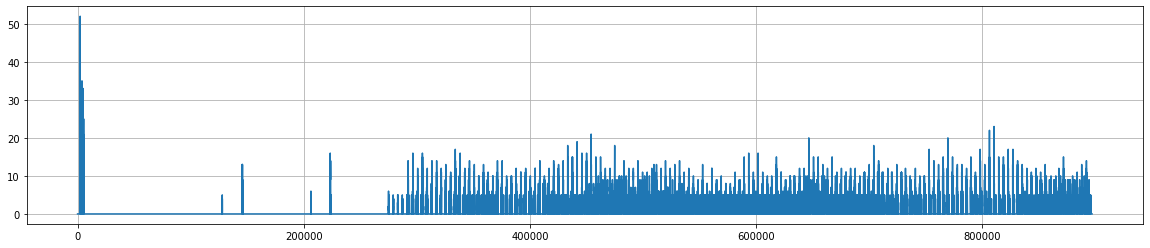

In [20]:
tf = profile.CreateIOTimeline()
plt.figure(figsize=(20,4))
plt.grid()
plt.plot(tf['time_step'], tf['operation_count']);

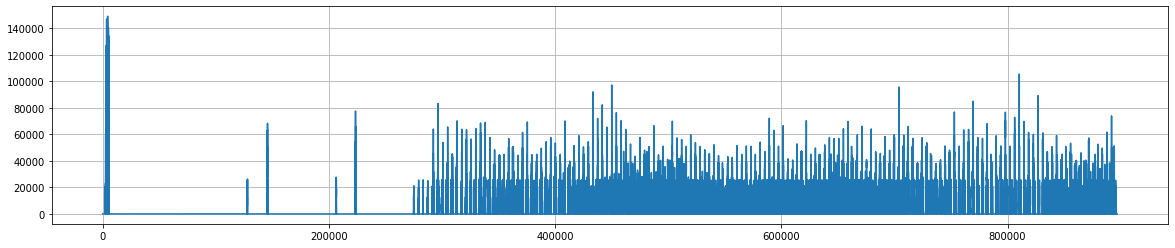

In [21]:
plt.figure(figsize=(20,4))
plt.grid()
plt.plot(tf['time_step'], tf['io_bytes']);

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/run1_p8_tm_df_cosmic_tagging_train.csv
Loaded Pre-processed Timeline from file: /tmp/temp_analysis/run1_p8_tm_df_cosmic_tagging_test.csv


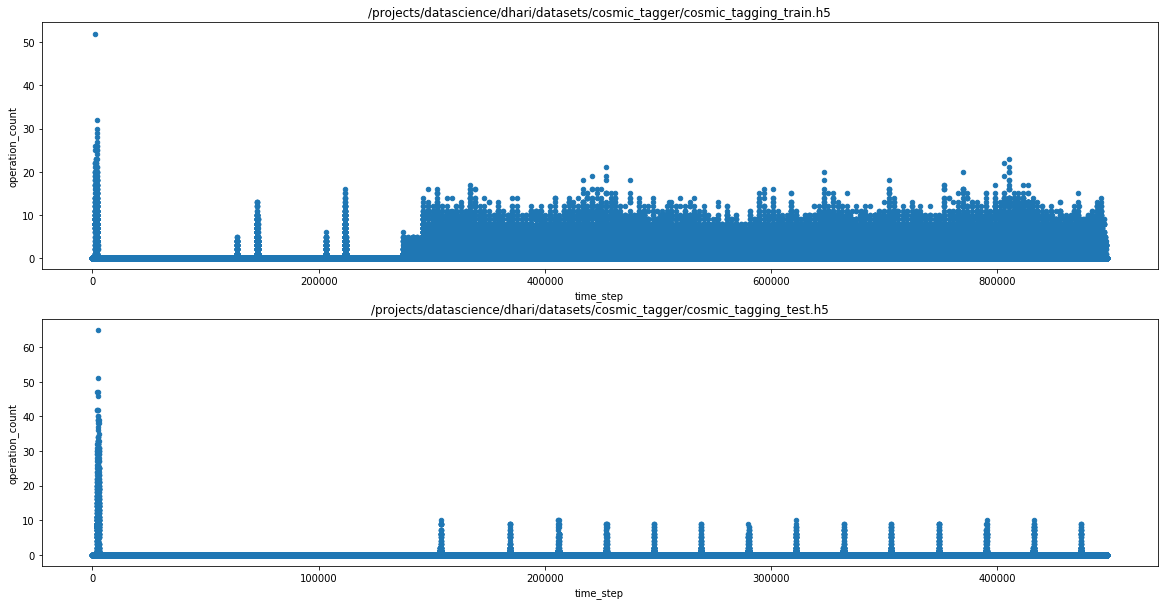

In [28]:
fig, axs = plt.subplots(nrows=df['Filename'].nunique(), ncols=1, figsize=(20, 10))
i=0
for file in df['Filename'].unique():
    tf = profile.CreateIOTimeline(filepath=file)
    tf.plot.scatter(x='time_step',y='operation_count', ax=axs[i])
    axs[i].set_title(file)
    i+=1

[============================================================] 100.0% 40714 of 40714 Creating Timeline 
[============================================================] 100.0% 39118 of 39118 Creating Timeline 
[============================================================] 100.0% 39299 of 39299 Creating Timeline 
[============================================================] 100.0% 38682 of 38682 Creating Timeline 
[============================================================] 100.0% 38010 of 38010 Creating Timeline 
[============================================================] 100.0% 38243 of 38243 Creating Timeline 
[============================================================] 100.0% 38774 of 38774 Creating Timeline 
[============================================================] 100.0% 38180 of 38180 Creating Timeline 


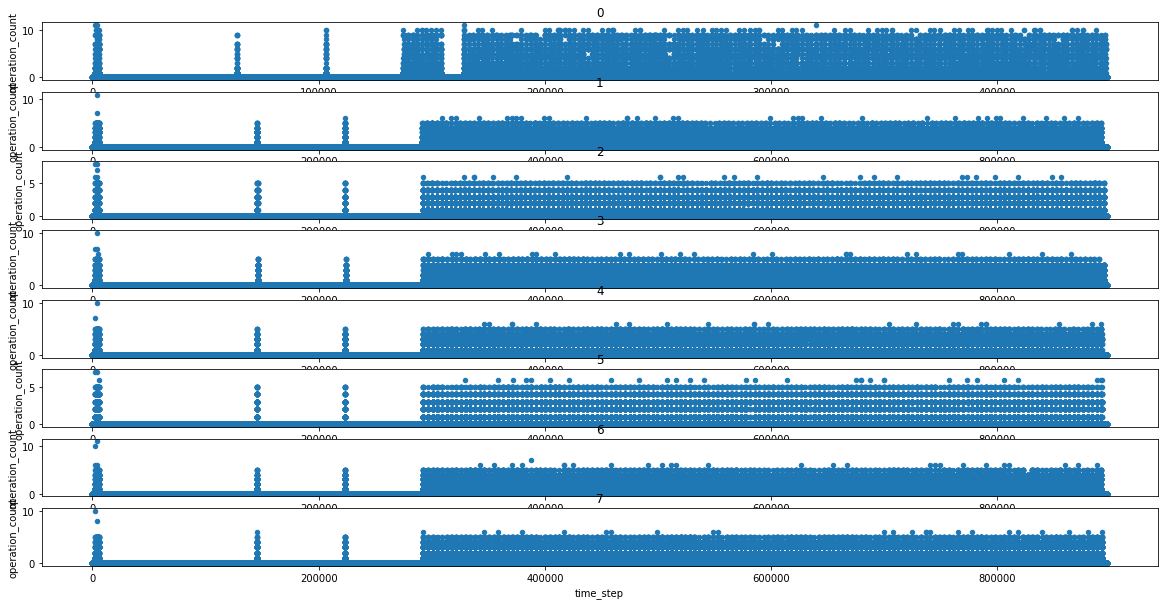

In [29]:
fig, axs = plt.subplots(nrows=df['Rank'].nunique(), ncols=1, figsize=(20, 10))
i=0
for rank in df['Rank'].unique():
    tf = profile.CreateIOTimeline(rank=rank)
    tf.plot.scatter(x='time_step',y='operation_count', ax=axs[i])
    axs[i].set_title(rank)
    i+=1

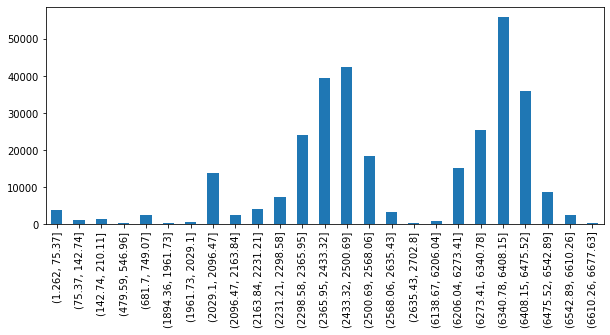

In [30]:
request_df = profile.GetIORequestDistribution()
request_df.plot(kind='bar', figsize=(10, 4));

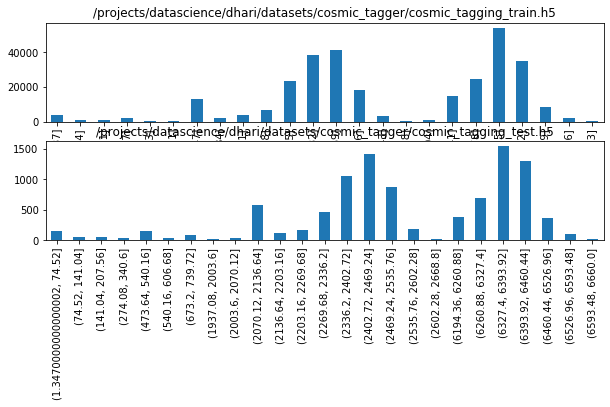

In [31]:
fig, axs = plt.subplots(nrows=df['Filename'].nunique(), ncols=1, figsize=(20, 10))
i=0
for file in df['Filename'].unique():
    tf = profile.GetIORequestDistribution(filepath=file)
    tf.plot(kind='bar', figsize=(10, 4), ax=axs[i])
    axs[i].set_title(file)
    i+=1

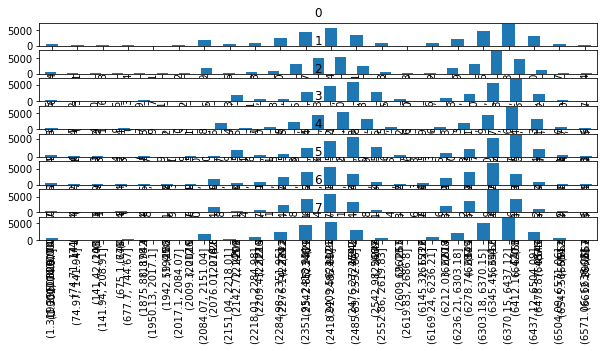

In [35]:
fig, axs = plt.subplots(nrows=df['Rank'].nunique(), ncols=1, figsize=(20, 3))
i=0
for rank in df['Rank'].unique():
    tf = profile.GetIORequestDistribution(rank=rank)
    tf.plot(kind='bar', figsize=(10, 4), ax=axs[i])
    axs[i].set_title(rank)
    i+=1

In [41]:
pp = pprint.PrettyPrinter(indent=1)
for file in df['Filename'].unique():
    pp.pprint(profile.GetFileSummary(file,ext='h5'))

{'ext': 'h5',
 'filename': 'cosmic_tagging_train',
 'io_size': 1259184741,
 'io_time': 353.5436999999889,
 'path': '/projects/datascience/dhari/datasets/cosmic_tagger/cosmic_tagging_train.h5',
 'size': 30272777678,
 'special': {'keys': [{'keys': [{'keys': [{'name': 'cluster_extents',
                                           'obj': <HDF5 dataset "cluster_extents": shape (129225,), type "|V16">,
                                           'shape': (129225,),
                                           'size': 129225,
                                           'type': 'dataset'},
                                          {'name': 'extents',
                                           'obj': <HDF5 dataset "extents": shape (43075,), type "|V16">,
                                           'shape': (43075,),
                                           'size': 43075,
                                           'type': 'dataset'},
                                          {'name': 'image_meta',
 